In [1]:
import numpy as np
import pandas as pd
from quasinet.qnet import qdistance, load_qnet
from emergenet.domseq import DomSeq, save_model, load_model
import os
import shutil

TAG='south_h3n2_ha_21'

In [2]:
#Q_PATH='../../qnet_predictions/qnet_models/'+TAG+'.joblib'
Q_PATH='../../paper_data/enet_predictions/enet_models/south_h3n2_ha/'+TAG+'.joblib.gz'
#import zipfile
#with zipfile.ZipFile(Q_PATH+'.zip', 'r') as zip_ref:
#    zip_ref.extractall(Q_PATH)
#if os.path.isdir(Q_PATH):
#    shutil.move(Q_PATH,Q_PATH+'D')
#    shutil.copy(Q_PATH+'D/'+Q_PATH.split('/')[-1],Q_PATH)
    
qnet=load_qnet(Q_PATH,gz=True)

#os.remove(Q_PATH)
#shutil. rmtree(Q_PATH+'D')

In [3]:
pwd

'/home/ishanu/ZED/Research/emergenet/extras/ntb'

In [4]:
qnet.feature_names

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'x104',
 'x105',
 'x106',
 'x107',
 'x108',
 'x109',
 'x110',
 'x111',
 'x112',
 'x113',
 'x114',
 'x115',
 'x116',
 'x117',
 'x118',
 'x119',
 'x120',
 'x121',
 'x122',
 'x

In [5]:
RAW_PATH='../../paper_data/enet_predictions/raw_data/gisaid/south_h3n2_ha/'

In [6]:
# initialize the DomSeq
domseq = DomSeq(seq_trunc_length=566, random_state=42)
df_north = domseq.load_data(filepath=RAW_PATH+TAG+'.fasta')

In [7]:
df_north

,id,sequence
0,A/Thailand/4/2021|A_/_H3N2|$SEGMENT_NAME|2021-...,MKTIIALSYILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTIT...
1,A/Thailand/7/2021|A_/_H3N2|$SEGMENT_NAME|2021-...,MKTIIALSYILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTIT...
2,A/Thailand/7/2021|A_/_H3N2|$SEGMENT_NAME|2021-...,MKTIIALSYILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTIT...
3,A/Thailand/8/2021|A_/_H3N2|$SEGMENT_NAME|2021-...,MKTIIALSYILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTIT...
4,A/Thailand/3/2021|A_/_H3N2|$SEGMENT_NAME|2021-...,MKTIIALSYILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTIT...
...,...,...
1779,A/Maryland/12235/2021|A_/_H3N2|$SEGMENT_NAME|2...,MKTIIALSNILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTIT...
1780,A/Maryland/12233/2021|A_/_H3N2|$SEGMENT_NAME|2...,MKTIIALSNILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTIT...
1781,A/Maryland/12227/2021|A_/_H3N2|$SEGMENT_NAME|2...,MKTIIALSNILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTIT...
1782,A/San_Diego/886322/2021|A_/_H3N2|$SEGMENT_NAME...,MKTIIALSNILCLVFAQKIPGNDNSTATLCLGHHAVPNGTVVKTIT...


In [9]:
seq=df_north.set_index('id').sequence.values
S=[np.array(list(x))[:565] for x in seq]

In [10]:
S[0].shape

(565,)

In [11]:
from scipy import stats as st
S_consensus=st.mode(S)[0][0]

In [12]:
import multiprocessing as mulpro
import itertools

In [13]:
s0__=S_consensus
qnet__=qnet

def fpar(s):
    return qdistance(s0__,s,qnet__,qnet__)

def f(s_array):
    pool = mulpro.Pool(processes=10)
    return np.array(pool.map(fpar, s_array))
    #return np.fromiter([qdistance(s0__,s,qnet__,qnet__) for s in s_array],dtype=np.float,count=len(s_array))
    

In [14]:
import shap
shap.initjs()

In [15]:
explainer = shap.KernelExplainer(f, np.array([S_consensus]))

In [16]:
S_=np.array([x for x in S if np.random.rand()<.6 ])
shap_values = explainer.shap_values(S_, nsamples=565)

  0%|          | 0/1049 [00:00<?, ?it/s]

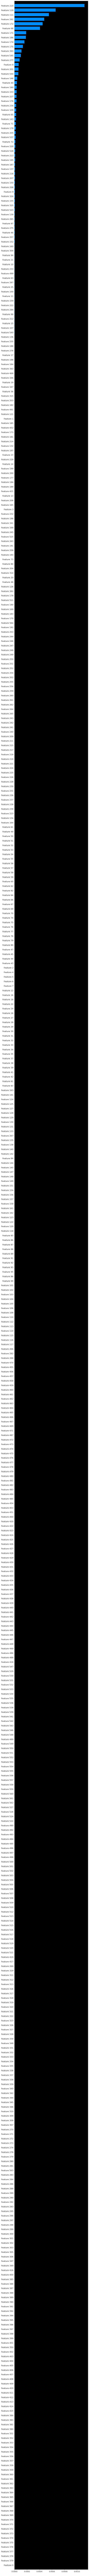

In [17]:
#shap.plots.bar(explainer(S__))
import pylab as plt
plt.style.use('dark_background')
shap.summary_plot(shap_values,S_, plot_type="bar",max_display=566)

In [21]:
nulldata=np.array([np.array(['']*565)])


In [22]:
explainerN = shap.KernelExplainer(f,nulldata)
#S_=np.array([x for x in S if np.random.rand()<.1 ])
shap_valuesN = explainerN.shap_values(S_, nsamples=565)

  0%|          | 0/1049 [00:00<?, ?it/s]

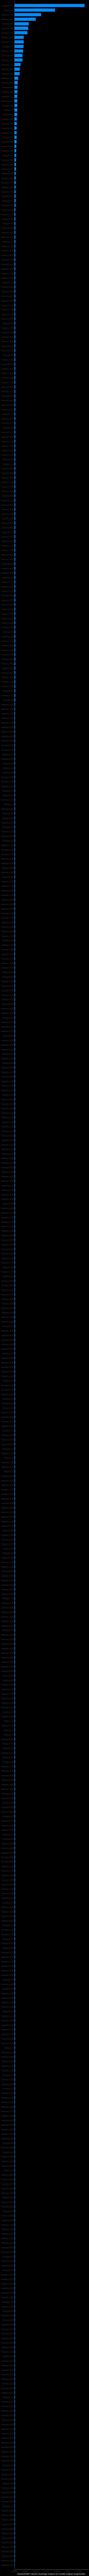

In [23]:
#shap.plots.bar(explainer(S__))
import pylab as plt
plt.style.use('dark_background')
shap.summary_plot(shap_valuesN,S_, plot_type="bar",max_display=565)

<AxesSubplot:ylabel='features'>

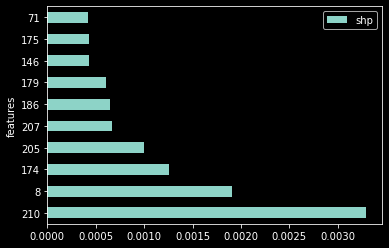

In [27]:
shp=pd.DataFrame(pd.DataFrame(shap_valuesN).abs().mean().sort_values(ascending=False),columns=['shp'])
shp.index.name='features'
shp.head(10).plot(kind='barh')

<AxesSubplot:xlabel='features'>

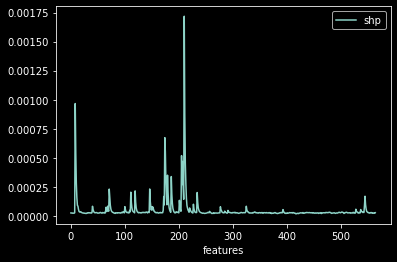

In [28]:
shp.sort_index().ewm(alpha=.5).mean().plot()

<AxesSubplot:ylabel='features'>

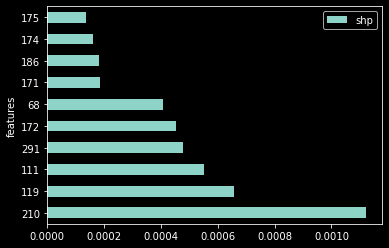

In [29]:
shpc=pd.DataFrame(pd.DataFrame(shap_values).abs().mean().sort_values(ascending=False),columns=['shp'])
shpc.index.name='features'
shpc.head(10).plot(kind='barh')

<AxesSubplot:xlabel='features'>

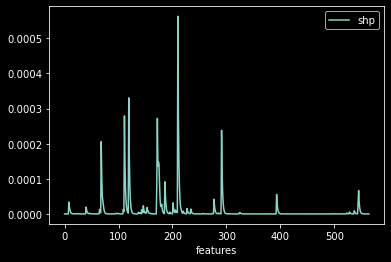

In [30]:
shpc.sort_index().ewm(alpha=.5).mean().plot()

In [31]:
shpc.to_csv(TAG+'_C.csv')
shp.to_csv(TAG+'_N.csv')
